
# ML Practical Ensemble Learning Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('petrol_consumption.csv')

In [3]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
data.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
data.shape

(48, 5)

In [7]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [8]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [9]:
data.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

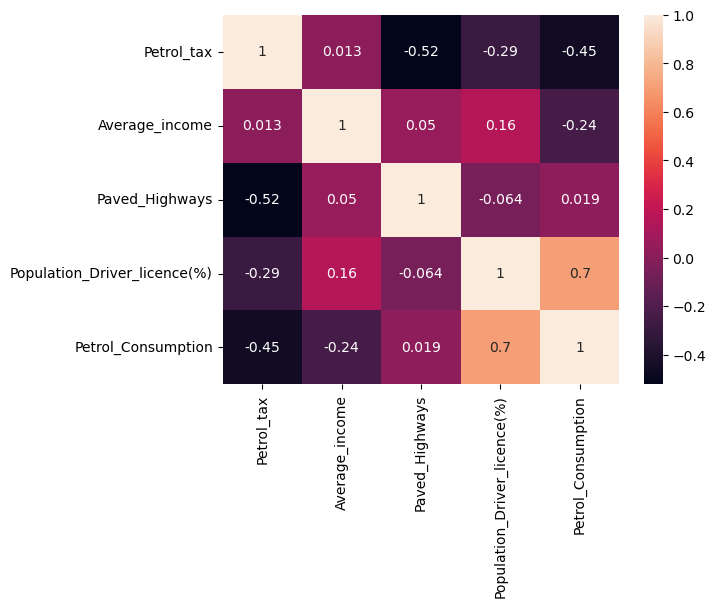

In [10]:
sns.heatmap(data.corr(),annot=True);

In [11]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=1)

In [13]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [15]:
regressor = RandomForestRegressor(n_estimators=200, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred 


array([605.99 , 533.665, 685.29 , 618.095, 564.34 , 484.665, 597.79 ,
       567.33 , 834.5  , 603.28 , 570.5  , 561.39 , 495.65 , 558.225,
       811.9  ])

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 42.039333333333325
Mean Squared Error: 3404.8566599999995
Root Mean Squared Error: 58.35114960307123


C:\Users\Milind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Milind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


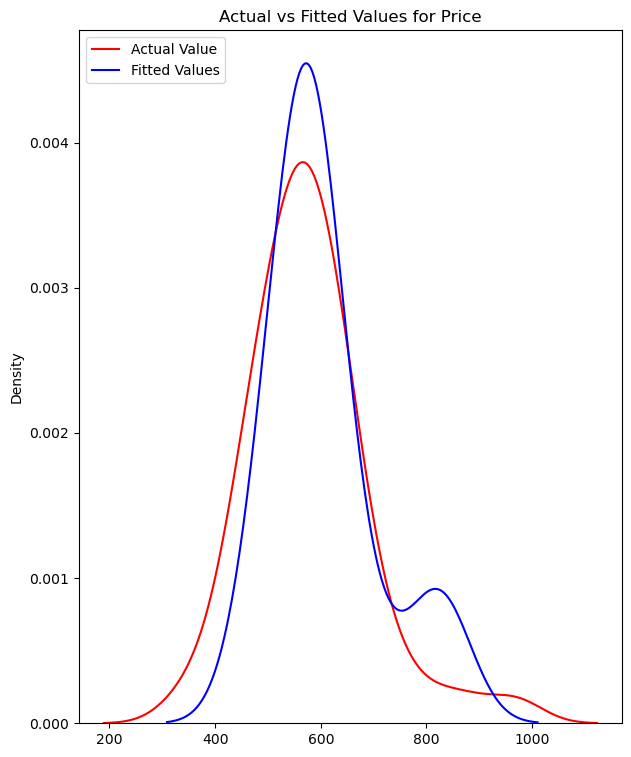

In [17]:
plt.figure(figsize=(7, 9))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.legend(loc="upper left")

plt.show()
plt.close()

# Using titanic dataset. Do the pre-processing of the dataset if required and create a ensemble models using any of the 2 ensemble bagging methods like random forest , logistic regression, etc. Evaluate and visualize the result. (Easy level)

In [18]:
df = pd.read_csv("Titanic.csv")

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [21]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [22]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.shape

(891, 9)

In [24]:
mean=df["age"].mean()
df["age"].replace(np.nan,mean,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [26]:
port =df.embarked.dropna().mode()[0]



'S'

In [27]:
df['embarked'].fillna(port,inplace=True)
df['embarked'] = df['embarked'].fillna(port)

In [33]:
df['sex'] = df['sex'].map( {'female': 1, 'male': 0} ).astype(int)


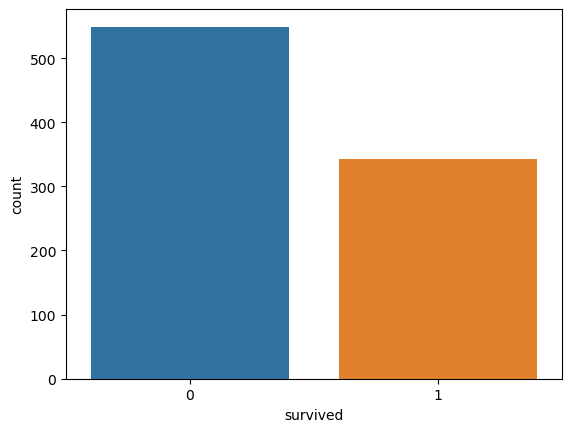

In [56]:
sns.countplot('survived',data=df)
plt.show()

In [57]:
df.groupby(['sex', 'survived'])['survived'].count()

sex  survived
0    0           468
     1           109
1    0            81
     1           233
Name: survived, dtype: int64

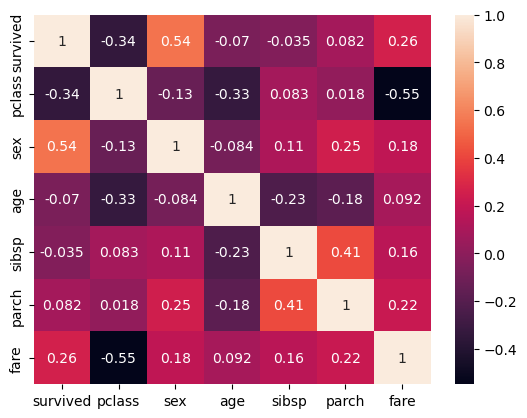

In [71]:
sns.heatmap(df.corr(),annot=True);

In [34]:
corr_matrix=df.corr()
corr_matrix['survived'].sort_values(ascending=False)

survived    1.000000
sex         0.543351
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.069809
pclass     -0.338481
Name: survived, dtype: float64

In [35]:
s= df.iloc[:,0:4].values
t=df.iloc[:,4].values 

In [36]:
from sklearn.preprocessing import StandardScaler
S_train, S_test, t_train, t_test = train_test_split(s, t, test_size=0.2,random_state=42)
sc = StandardScaler()
S_train = sc.fit_transform(S_train)
S_test = sc.transform(S_test) 

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(S_train, t_train)
t_pred = logreg.predict(S_test)
acc_log = round(logreg.score(S_train, t_train) * 100, 2)
acc_log

68.12

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(S_train, t_train)
t_pred = random_forest.predict(S_test)
random_forest.score(S_train, t_train)
acc_random_forest = round(random_forest.score(S_train, t_train) * 100, 2)
acc_random_forest

83.01

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(t_test, t_pred))
print('Mean Squared Error:', metrics.mean_squared_error(t_test, t_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(t_test, t_pred))) 

Mean Absolute Error: 0.4581005586592179
Mean Squared Error: 0.6927374301675978
Root Mean Squared Error: 0.8323084945905561


#  Use breast cancer dataset. The dataset contains a total number of 10 features labeled in either benign or malignant classes. The features have 699 instances out of which 16 feature values are missing. The dataset only containsnumeric values. Implement the ensemble method using Decision tree classifiers.(Moderate Level) 



In [40]:
d = pd.read_csv( 'Breast Cancer.csv')

In [41]:
d.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [42]:
d.shape

(569, 33)

In [43]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [64]:
d.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [44]:
d = d.drop(["id"], axis = 1)

In [45]:
d = d.drop(["Unnamed: 32"], axis = 1)

In [46]:
d = d[d.diagnosis == "M"]

In [47]:
x = d.drop(["diagnosis"], axis = 1)
y = d.diagnosis.values

In [48]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

C:\Users\Milind\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Milind\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
dt.score(x_test, y_test)

1.0

# Using Pima Indian Diabities dataset. Do the preprocessing if required and extract the features from it and Apply a XGBoost and AdaBoost Ensemble Methods and construct the SVM classification model for the dataset. Analyze the accuracy of your model(Moderate Level) 

In [70]:
pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [59]:
p = pd.read_csv( 'diabetes.csv')

In [61]:
p.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
p.shape

(768, 9)

In [63]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
p.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
p['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

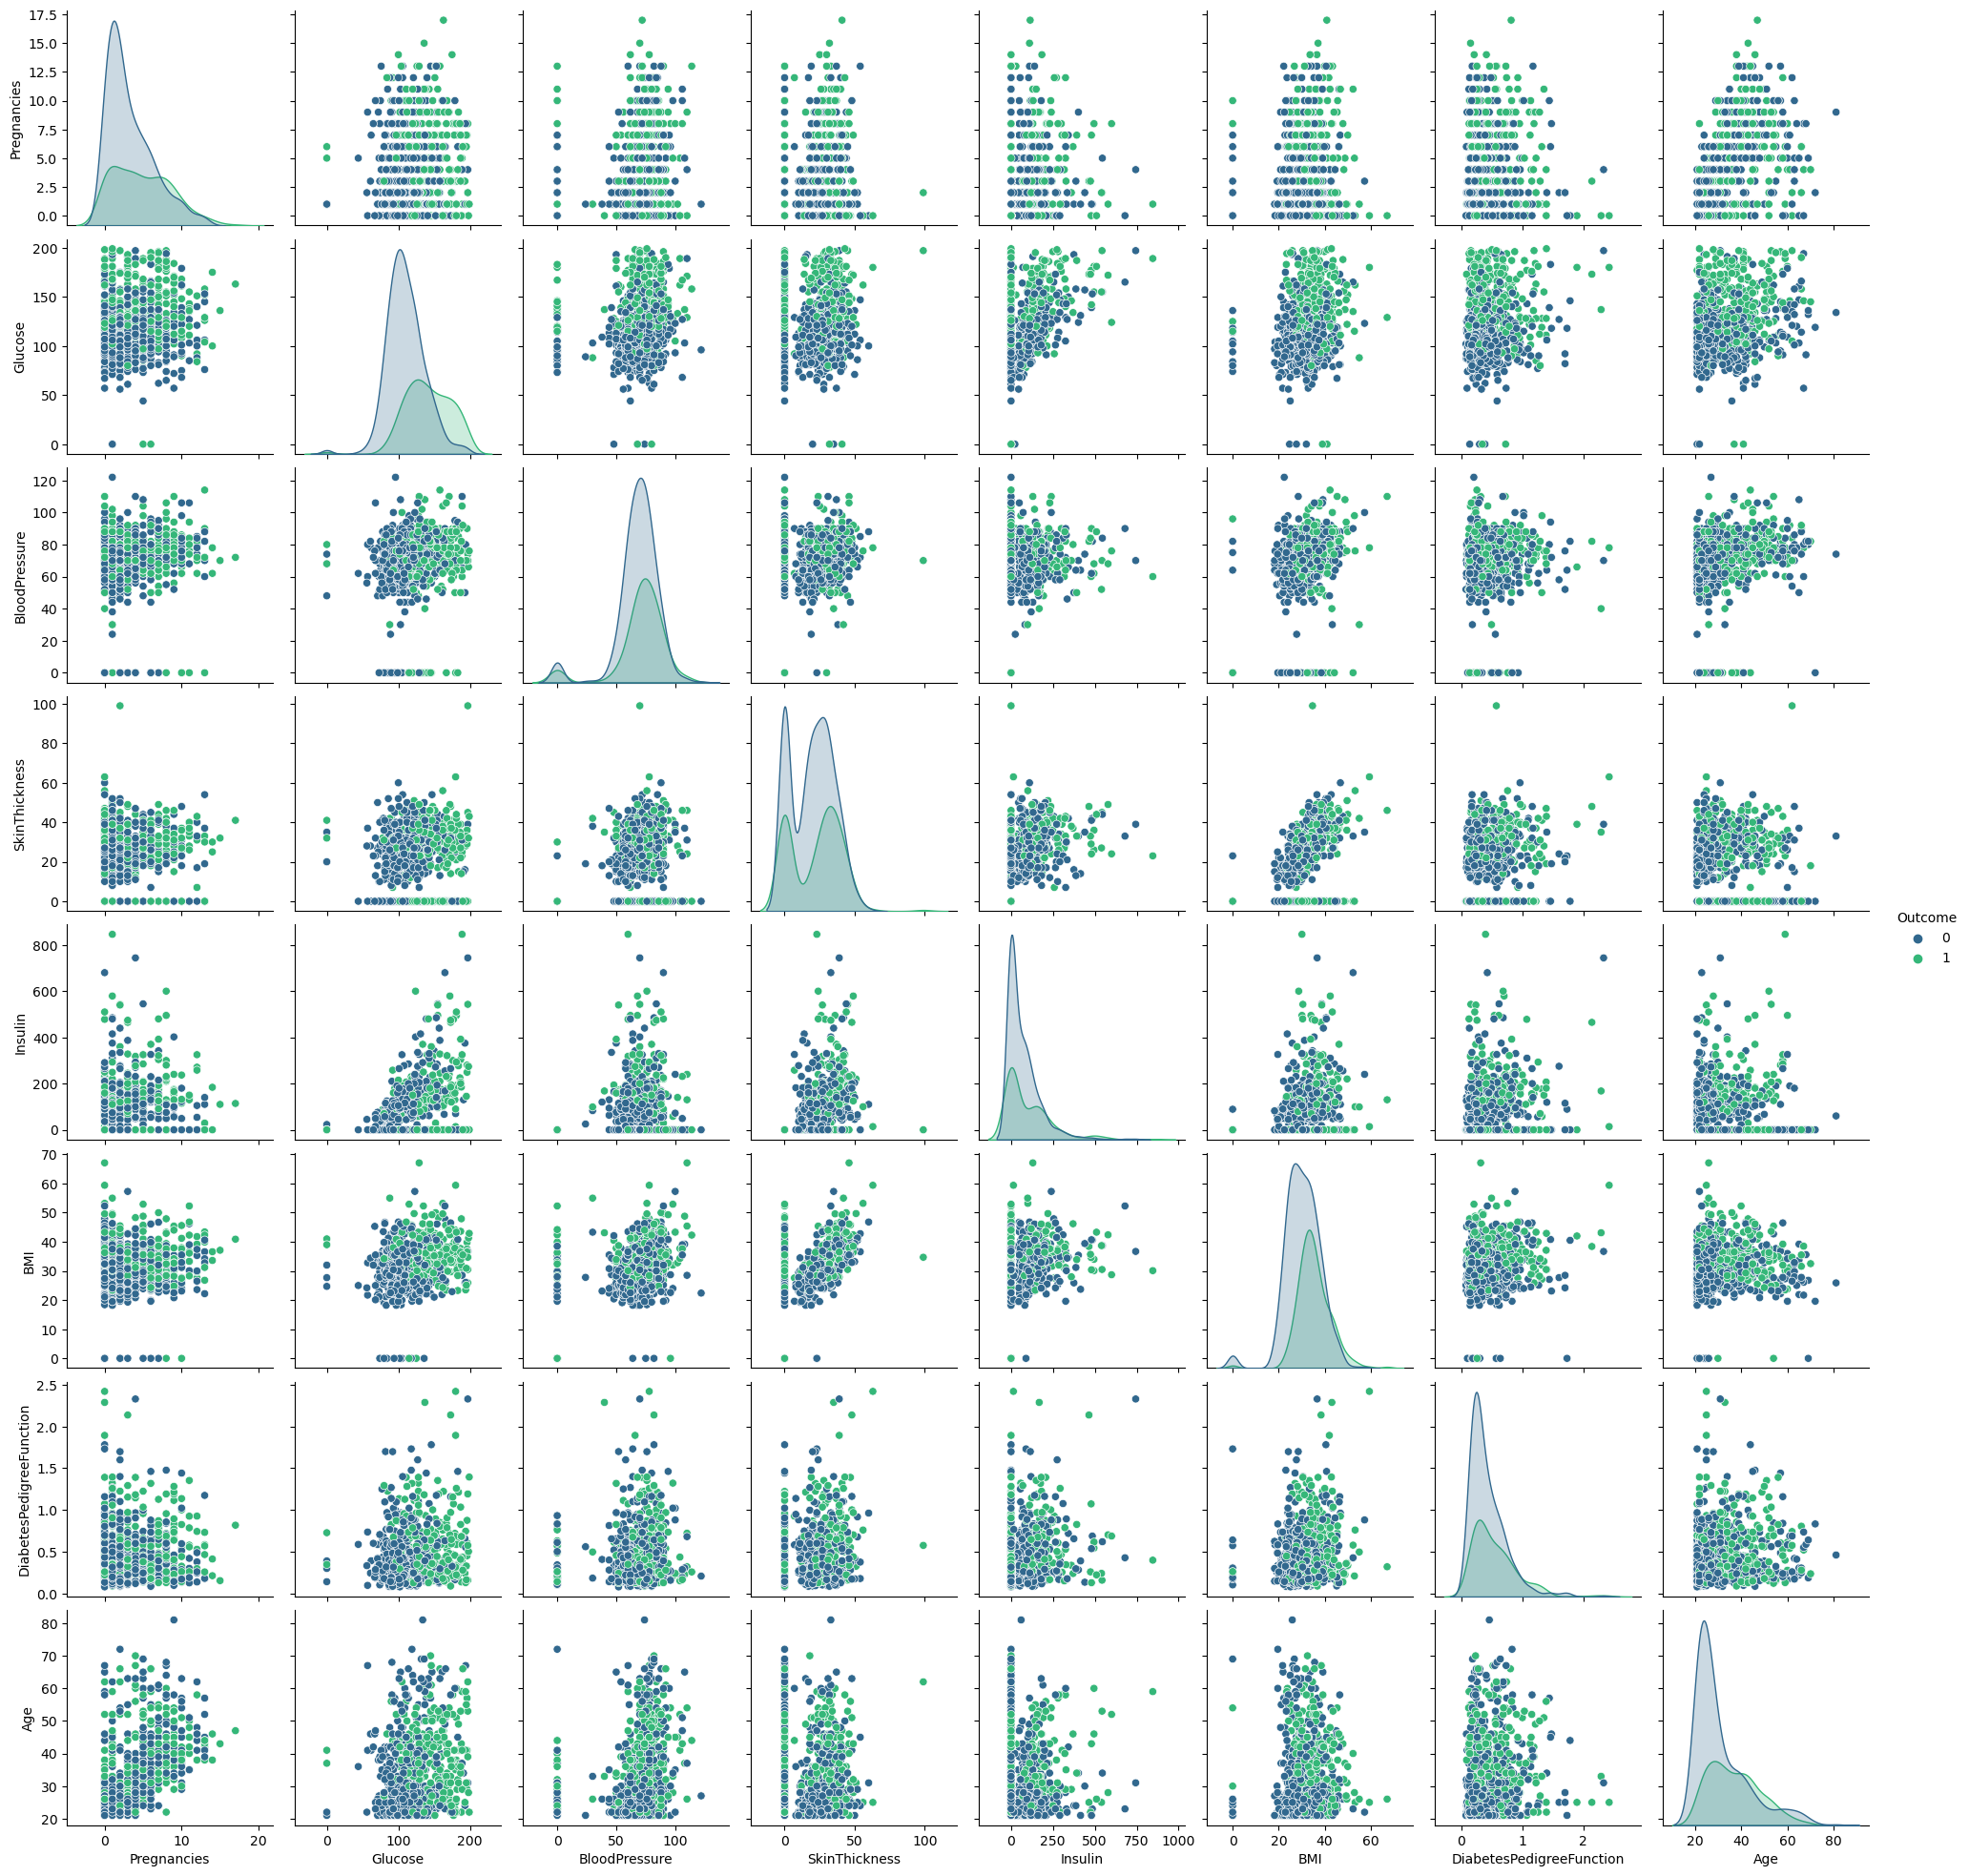

In [73]:
sns.pairplot(p,hue='Outcome',palette='viridis')
plt.show()

In [107]:
X = p.drop(columns = ['Outcome'])
y = p['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [108]:
ss=StandardScaler()
ss.fit(p.drop(['Outcome'], axis=1))
scaled=ss.transform(p.drop(['Outcome'], axis=1))
scaled_df=pd.DataFrame(data=scaled, columns=p.columns[:-1])

In [111]:
xgbc = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [115]:
pre=xgbc.predict(X_test)

In [116]:
pre

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [117]:
print('Accuracy Score: ',round(accuracy_score(y_test,pre), ndigits=2))

Accuracy Score:  0.8


In [123]:
x=p.iloc[:,:-1]
y=p.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [124]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)

SVC()

In [125]:
pred=model.predict(x_test)

In [126]:
pred

array([  0,  49,   0, 140, 120,  49,   0,   0,   0,   0,   0,   0, 140,
         0,   0,   0,   0,   0,   0, 140,   0,  49,   0,   0,   0,   0,
       140, 140,   0, 120,   0, 120,   0,   0,   0, 140, 120,   0, 140,
       105, 120,   0,   0, 140,   0, 215,   0,   0,   0,   0,   0, 480,
       140,   0,   0,   0,   0, 120,   0, 140, 140, 120, 120,   0,   0,
       120,   0, 180, 480, 120, 480,   0,   0,   0,   0, 140,  49,   0,
         0,   0, 120,   0,   0,   0,   0,   0,   0, 120,   0,   0,   0,
       140,   0,   0,   0,  49,   0,  49, 180, 120,   0, 120,   0, 210,
       120, 180,   0, 480,   0,   0,   0, 180, 480, 180, 180, 120, 480,
         0,   0, 140, 120,   0, 480,  49, 180, 744,   0, 120, 265, 140,
         0,   0, 120,  49,   0, 120,   0, 140,   0,   0,   0, 180,   0,
         0, 480,   0,  49,   0,   0,  49, 120, 120,   0,   0, 140,   0,
         0,  49, 120, 120, 140, 215,   0, 120,   0,   0,   0,   0, 140,
         0, 140,   0,   0, 120, 120, 105,   0, 140, 140, 120,   

In [141]:
model.score(x_train, y_train)

0.5325884543761639

In [135]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [136]:
predict=ada.predict(x_test)

In [137]:
predict

array([140, 140,   0, 140, 140, 140,   0,   0,   0, 140, 140,   0, 140,
         0,   0,   0,   0,   0, 140, 140,   0, 140,   0,   0,   0,   0,
       140, 140,   0, 140,   0, 140,   0,   0,   0, 140, 140,   0, 140,
       140, 140,   0,   0, 140,   0, 140,   0, 140,   0,   0,   0, 140,
       140,   0,   0,   0,   0, 140,   0, 140, 140, 140, 140,   0,   0,
       140,   0, 140, 140, 140, 140,   0,   0,   0,   0, 140, 140, 140,
       140,   0, 140,   0,   0,   0,   0,   0,   0, 140,   0,   0,   0,
       140,   0,   0,   0, 140,   0, 140, 140, 140,   0, 140,   0, 140,
       140, 140,   0, 140,   0,   0,   0, 140, 579, 140, 140, 140, 140,
         0,   0, 140, 140, 140, 140, 140, 140, 680,   0, 140, 140, 140,
         0,   0, 140, 140,   0, 140,   0, 140, 140,   0,   0, 140,   0,
         0, 140,   0, 140,   0,   0, 140, 140, 140,   0,   0, 140,   0,
         0, 140, 140, 140, 140, 140,   0, 140,   0,   0,   0,   0, 140,
         0, 140,   0,   0, 140, 140, 140,   0, 140, 140, 140,   

In [140]:
ada.score(x_train, y_train)

0.515828677839851